In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Read the data
df=pd.read_csv("../input/covid19-in-india/covid_19_india.csv")

In [4]:
# Get mean, median , standard deviation , count , minimum , maximum values , etc
df.describe()

,Sno,Cured,Deaths,Confirmed
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,2036.000000,3111.314910,168.402113,5732.080324
std,1175.340802,10887.115076,737.798086,19306.478679
min,1.000000,0.000000,0.000000,0.000000
25%,1018.500000,3.000000,0.000000,30.000000
50%,2036.000000,67.000000,3.000000,335.000000
75%,3053.500000,1386.500000,36.500000,3055.000000
max,4071.000000,140325.000000,10289.000000,254427.000000


In [5]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       4071 non-null   int64 
 1   Date                      4071 non-null   object
 2   Time                      4071 non-null   object
 3   State/UnionTerritory      4071 non-null   object
 4   ConfirmedIndianNational   4071 non-null   object
 5   ConfirmedForeignNational  4071 non-null   object
 6   Cured                     4071 non-null   int64 
 7   Deaths                    4071 non-null   int64 
 8   Confirmed                 4071 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 286.4+ KB


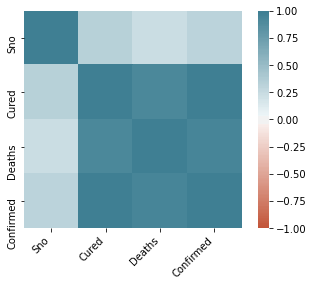

In [22]:
# Correlation 
corr = df.corr()
# Drawing a heatmap for Cured , Confirmed and Deaths
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [25]:
# Prediction for Confirmed Cases , Recovered Cases and Death Cases
from fbprophet import Prophet
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Cured'].reset_index()

In [27]:
# Prophet is a data frame with two columns ds(datestamp) and 
#y(numeric value that represents the measurement we wish to predict)
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
161,2020-05-30,173763
162,2020-06-30,566840
163,2020-01-31,1
164,2020-03-31,1397
165,2020-05-31,182143


In [28]:
#  Creating a 95 per cent prediction interval
m = Prophet(interval_width=0.95) 
m.fit(confirmed) 
future = m.make_future_dataframe(periods=7) 
future.tail()

,ds
168,2020-12-10
169,2020-12-11
170,2020-12-12
171,2020-12-13
172,2020-12-14


In [29]:
#predicting the future with date, and upper and lower limit of y value
# predicted value -yhat
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
168,2020-12-10,301625.546613,-145110.327492,691100.914362
169,2020-12-11,325349.523782,-70519.301429,714262.191463
170,2020-12-12,337469.109676,-90876.956011,724960.603468
171,2020-12-13,330636.294606,-84495.243085,761694.844581
172,2020-12-14,385243.007409,16534.323454,804450.225218


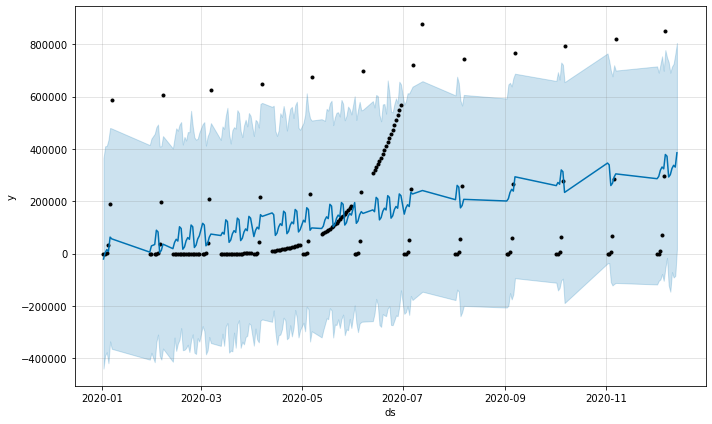

In [30]:
confirmed_forecast_plot = m.plot(forecast)

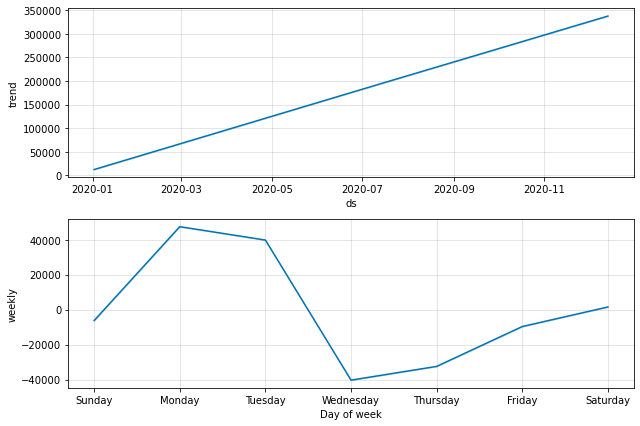

In [31]:
confirmed_forecast_plot =m.plot_components(forecast)

In [ ]:
# Death Prediction

In [35]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
168,2020-12-10
169,2020-12-11
170,2020-12-12
171,2020-12-13
172,2020-12-14


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
168,2020-12-10,8261.685367,-4218.939113,19522.650679
169,2020-12-11,8936.194310,-2533.763034,20130.075919
170,2020-12-12,9265.196560,-2508.314773,21625.219869
171,2020-12-13,9080.249989,-2871.095614,21002.943583
172,2020-12-14,10457.389989,-949.521831,21959.956619
